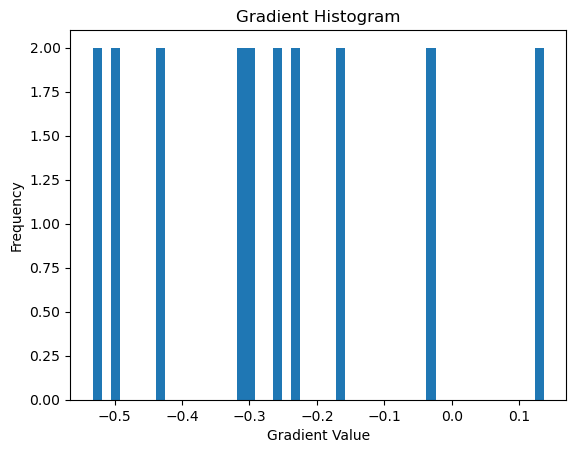

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from flax import linen as nn
from flax.training import train_state
import optax
# Define your model
class MyModel(nn.Module):
    def setup(self):
        self.dense = nn.Dense(10)

    def __call__(self, x):
        return self.dense(x)

# Create a dummy training state
def create_train_state():
    model = MyModel()
    params = model.init(jax.random.PRNGKey(0), jnp.ones((1, 1)))['params']
    return train_state.TrainState.create(
        apply_fn=model.apply,
        params=params,
        tx=optax.adam(learning_rate=0.001),
    )

state = create_train_state()

# Function to compute gradients
def compute_gradients(state, x, y):
    def loss_fn(params):
        logits = state.apply_fn({'params': params}, x)
        loss = jnp.mean((logits - y) ** 2)
        return loss

    grads = jax.grad(loss_fn)(state.params)
    return grads

# Dummy data
x = jnp.ones((1, 1))
y = jnp.ones((1, 10))

grads = compute_gradients(state, x, y)

# Plot histogram of gradients
def plot_gradient_histogram(grads):
    flat_grads = [g.flatten() for g in jax.tree_util.tree_leaves(grads)]
    all_grads = np.concatenate(flat_grads)
    plt.hist(all_grads, bins=50)
    plt.title('Gradient Histogram')
    plt.xlabel('Gradient Value')
    plt.ylabel('Frequency')
    plt.show()

plot_gradient_histogram(grads)


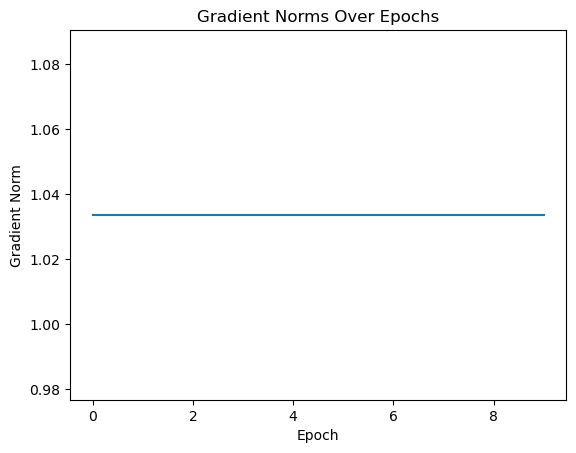

In [2]:
import matplotlib.pyplot as plt

# Function to compute gradient norms
def compute_gradient_norms(grads):
    return [jnp.linalg.norm(g).tolist() for g in jax.tree_util.tree_leaves(grads)]

# Simulate tracking gradient norms over epochs
epochs = 10
gradient_norms = []

for epoch in range(epochs):
    grads = compute_gradients(state, x, y)
    norms = compute_gradient_norms(grads)
    gradient_norms.append(np.mean(norms))  # Average norm across all parameters

plt.plot(range(epochs), gradient_norms)
plt.title('Gradient Norms Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Gradient Norm')
plt.show()


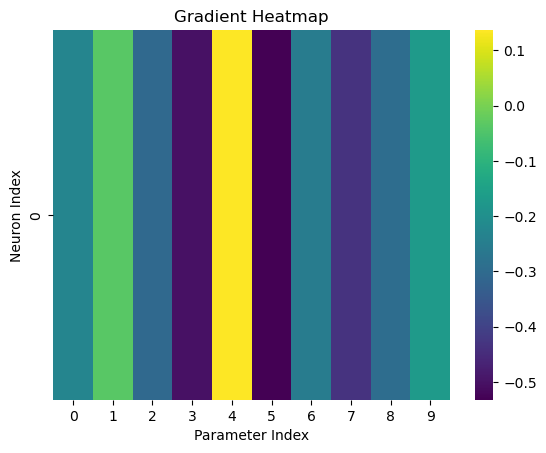

In [3]:
import seaborn as sns

def plot_gradient_heatmap(grad):
    grad_matrix = grad.reshape(-1, grad.shape[-1])  # Adjust as needed for your parameter shape
    sns.heatmap(grad_matrix, cmap='viridis', cbar=True)
    plt.title('Gradient Heatmap')
    plt.xlabel('Parameter Index')
    plt.ylabel('Neuron Index')
    plt.show()

# Assuming `grads` contains a specific weight matrix gradient
weight_grad = grads['dense']['kernel']  # Adjust based on actual parameter names
plot_gradient_heatmap(weight_grad)

ValueError: x and y must have same first dimension, but have shapes (3,) and (2,)

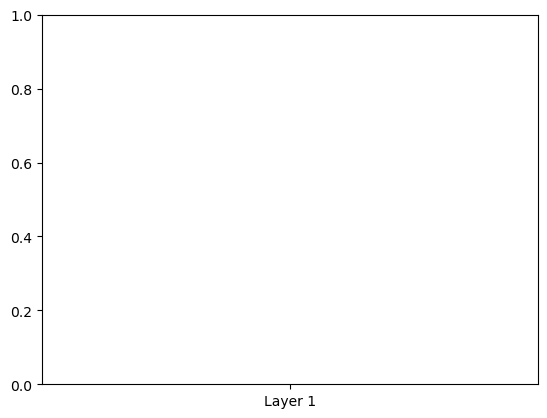

In [4]:
def plot_gradient_flow(grads, layer_names):
    gradient_flows = [jnp.linalg.norm(g).tolist() for g in jax.tree_util.tree_leaves(grads)]
    plt.plot(layer_names, gradient_flows, marker='o')
    plt.title('Gradient Flow Through Layers')
    plt.xlabel('Layer')
    plt.ylabel('Gradient Norm')
    plt.xticks(rotation=90)
    plt.show()

layer_names = ['Layer 1', 'Layer 2', 'Layer 3']  # Replace with actual layer names
plot_gradient_flow(grads, layer_names)